# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
%matplotlib inline

In [2]:
# Load the dataset from the local data folder
df = pd.read_csv('data/ExtraaLearn.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (4612, 15)

Column names: ['ID', 'age', 'current_occupation', 'first_interaction', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']

First few rows:


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [3]:
data = df.copy()
data.head(8)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.68200,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.01500,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.98500,Email Activity,No,No,No,No,No,0


In [4]:
data.tail()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [6]:
missing_values = data.isnull().sum()
missing_values # returns the count of null values by column index and since the values are zero, there are no null values in the dataset.


ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [7]:
data.duplicated().sum() #data = data.drop_duplicates() if there are any duplicates encountered. Since there are none encountered, this command is not required.


0

In [8]:
data.nunique()


ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [9]:
data.drop(["ID"], axis = 1, inplace = True) #This column is dropped as we determine it is not important in our evaluation due to the uniqueness of each ID.


Observations: ID is an identifier which is unique for each lead. We can drop this column since it would provide no value to the analysis.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [10]:
#creating numerical columns
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit']
#creating categorical columns
cat_cols = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']


In [11]:
data[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400


Observations: Average lead age is 46.201. With range = 63-18= 45 50% of leads spend 376 seconds on the website. However there are some extreme values given that max is 2537 seconds and min being 0. Average number of pages on the website viewed during the visits is 3.026, and the average number of times a lead has visited the website is 3.567.

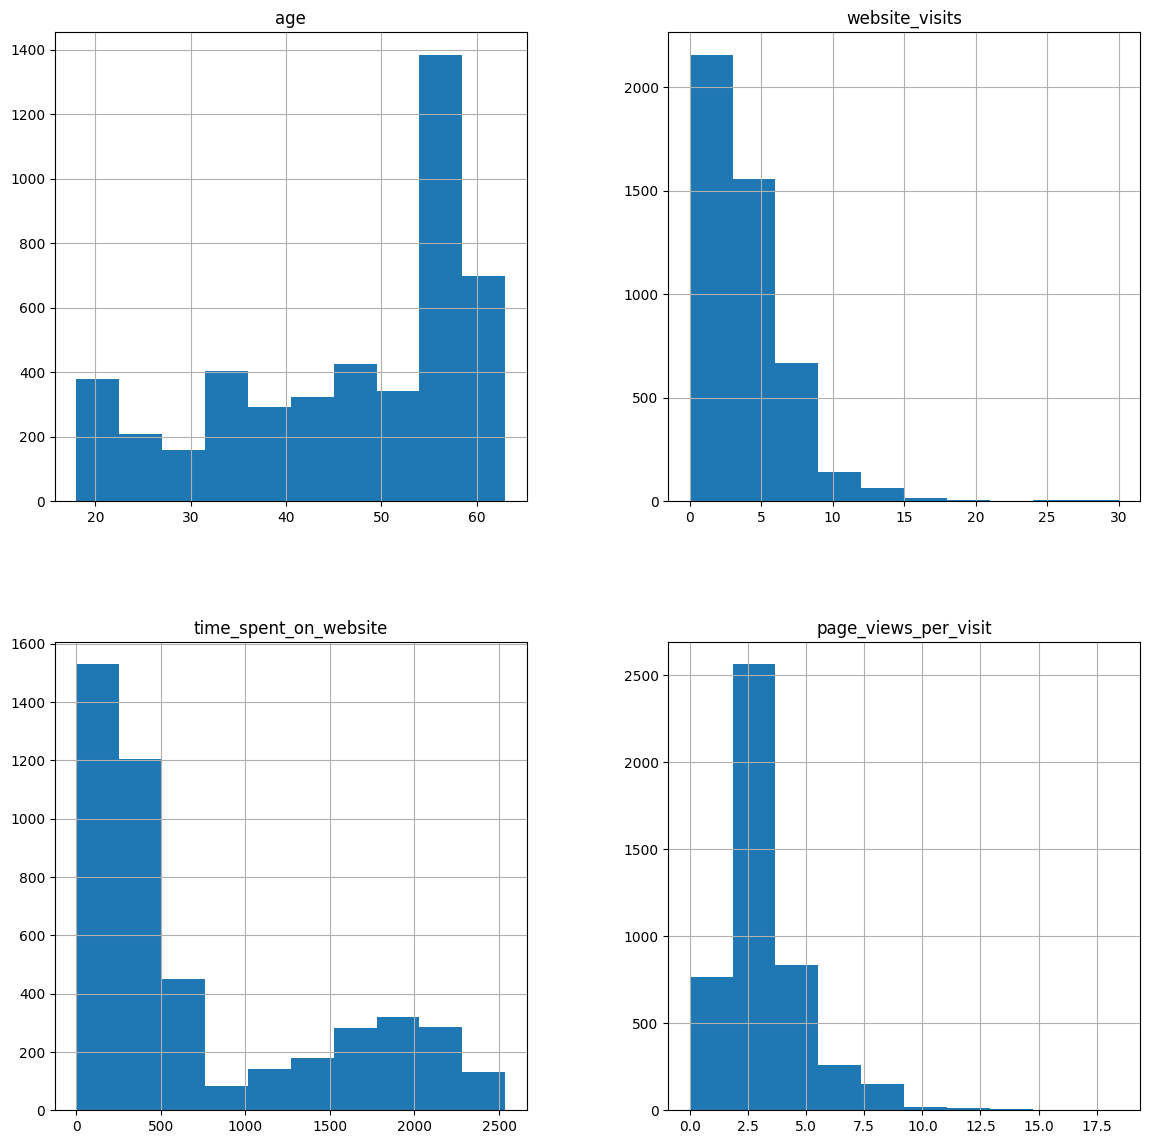

In [12]:
# Creating histograms
data[num_cols].hist(figsize=(14,14))
plt.show()

Observations: The number of leads wrt age is skewed left. This indicates that leads are increasing wrt age. And leads wrt website_visits is skewed right.Indicating that the frequency of number of leads decrease as number of visits increase. Time spent on the website has a bimodal structure with peaks at 0-250 then at 1750-2000 seconds spent online, and the central tendency of page views per visit is narrow and skewed slightly to the right. It would be closer to the normal distribution had the variance been greater than current value. The peak for the page_views_per_visit is at 1.875-3.75 pages.

Univariate Analysis


In [13]:
for column in cat_cols:
    print(data[column].value_counts(normalize = True)) #we can leave the normalize parameter out of the statement is we want to display raw counts.
    print("-" * 50)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
-----------------

Observations: The status conversion rate (yes) is 29.86%. Around 57.00% of the leads are of the professional background. Website proportions are greater than mobile app proportions which can hint at a higher engaement level on the website. Out of all the last_activity interactions, the email activity has more leads than its counterparts. Most leads have high-medium profile completion. Out of all the four channels and the referral section, the educational channel has the preferred mode of interaction.

Bivariate and Multivariate Analysis

How is the conversion rate related to other categorical variables?



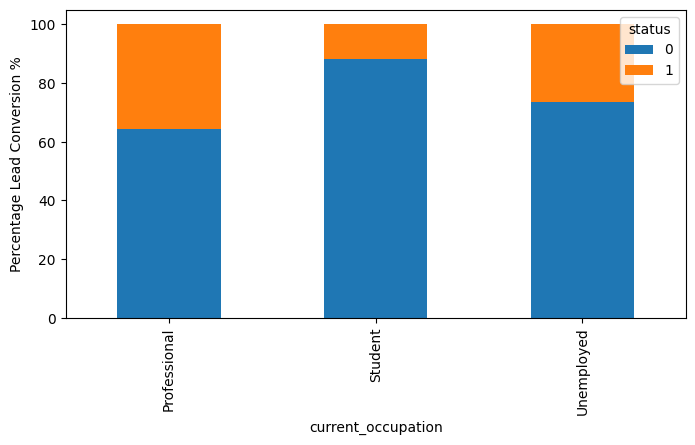

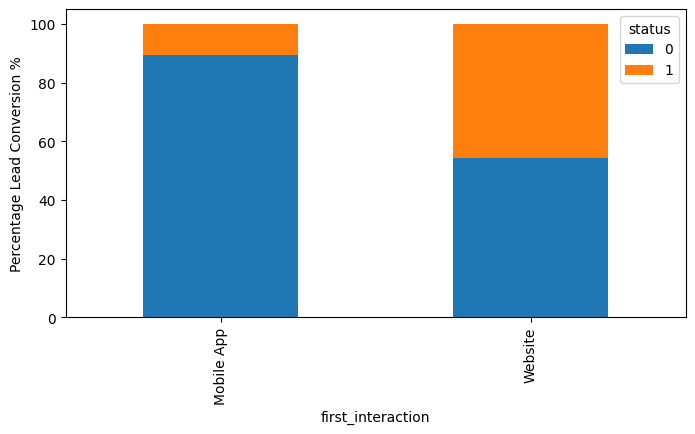

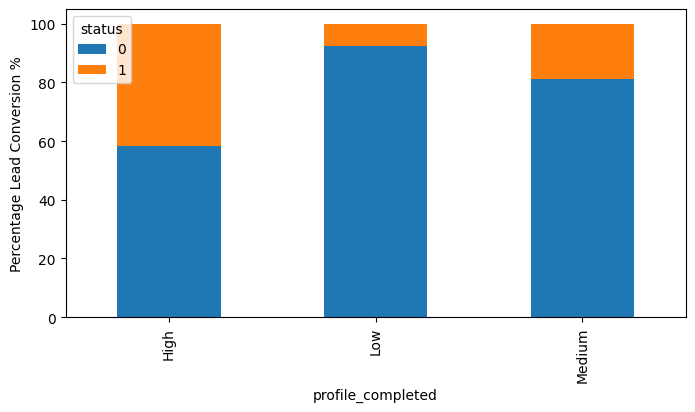

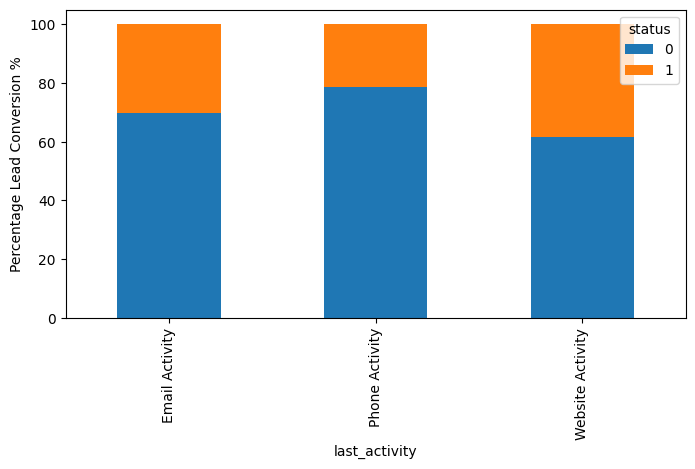

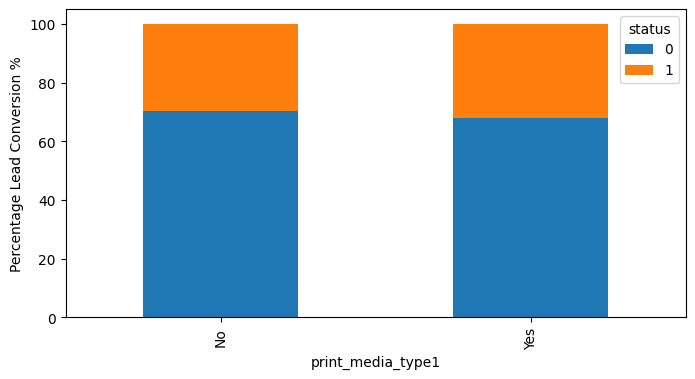

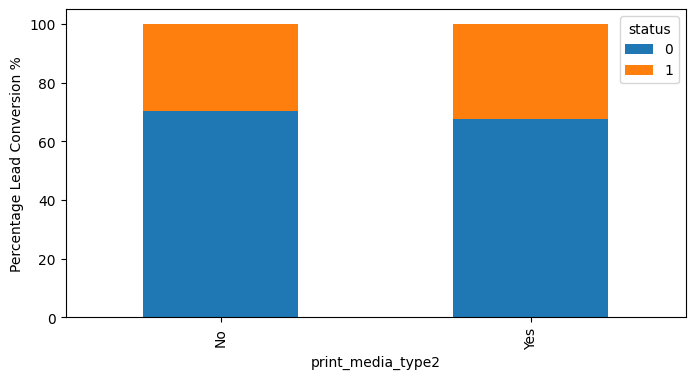

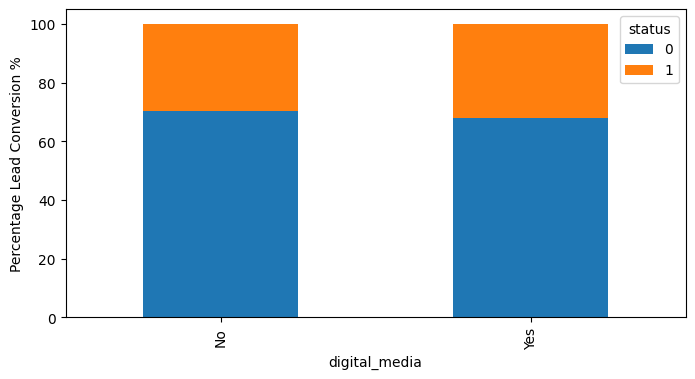

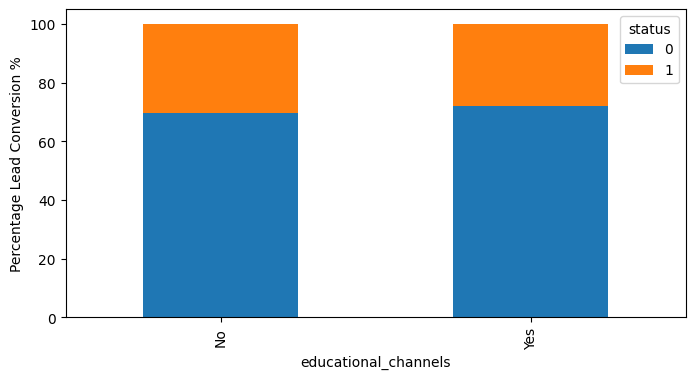

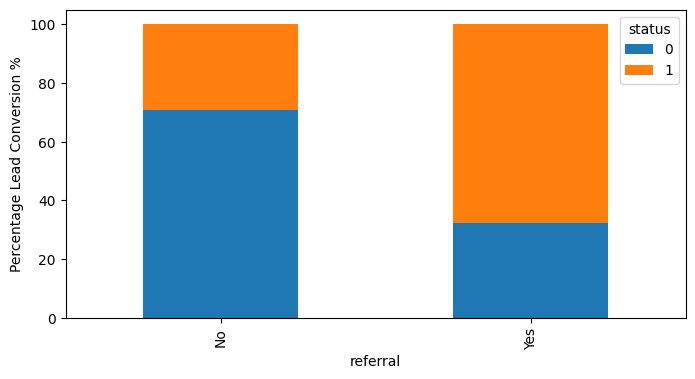

In [14]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(data[i],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Lead Conversion %')

In [15]:
# Mean of numerical variables grouped by status
data.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.15301,3.57898,577.42071,3.02573
1,48.66376,3.53813,1068.39797,3.02705


<Axes: >

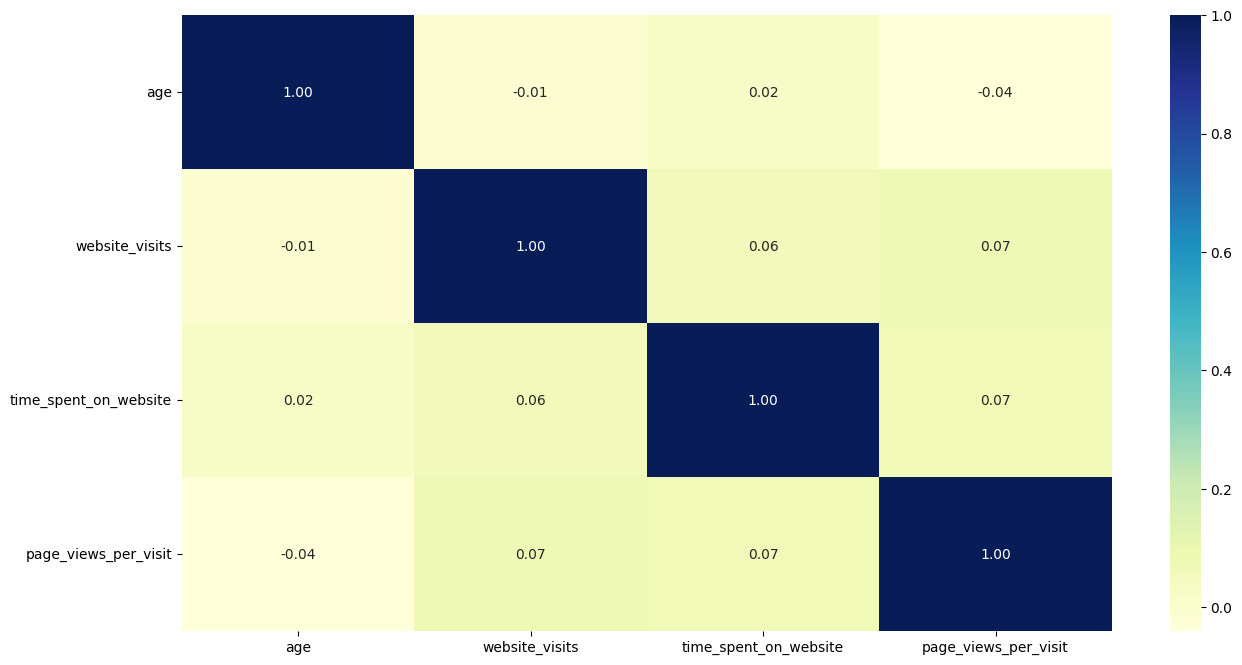

In [16]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

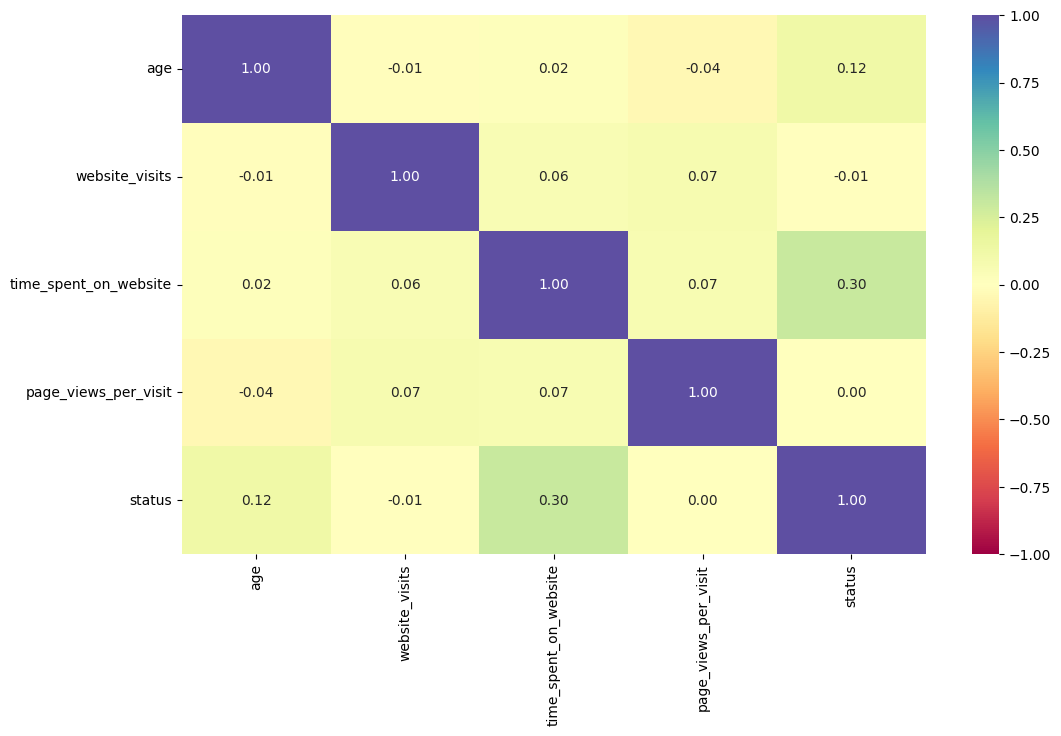

In [17]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Further Univariate Analysis

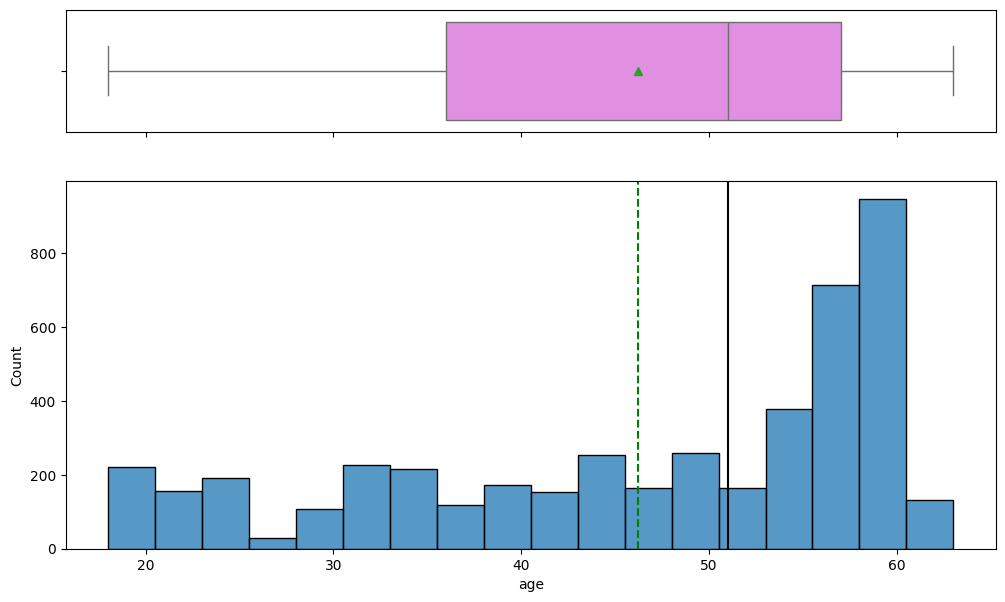

In [18]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
histogram_boxplot(data, "age")

Observation: Has more outliers given that it is skewed heavily to the right.



In [19]:
data[data["website_visits"] == 0].shape


(174, 14)

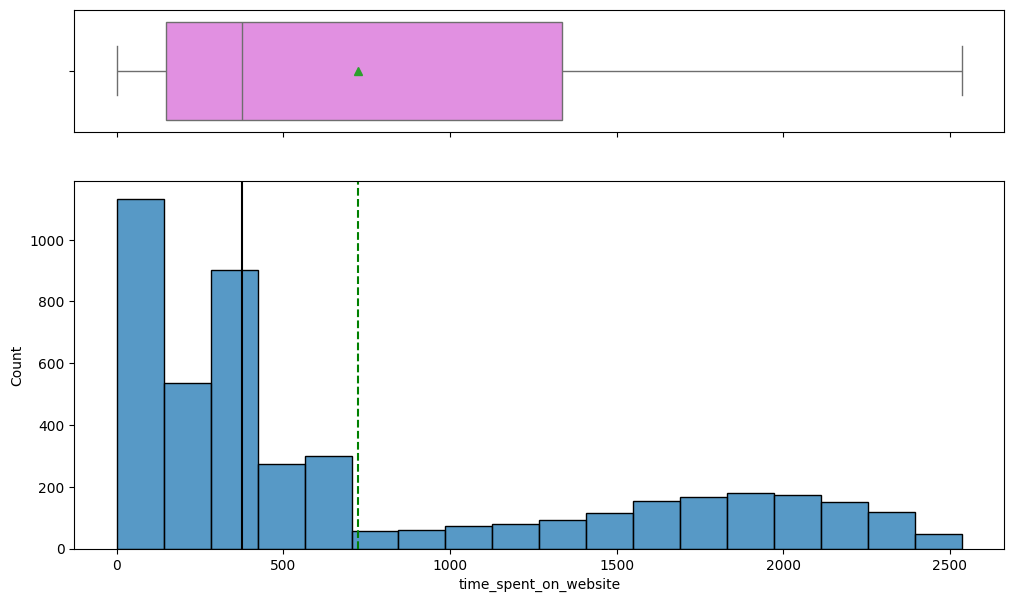

In [20]:
histogram_boxplot(data, "time_spent_on_website")


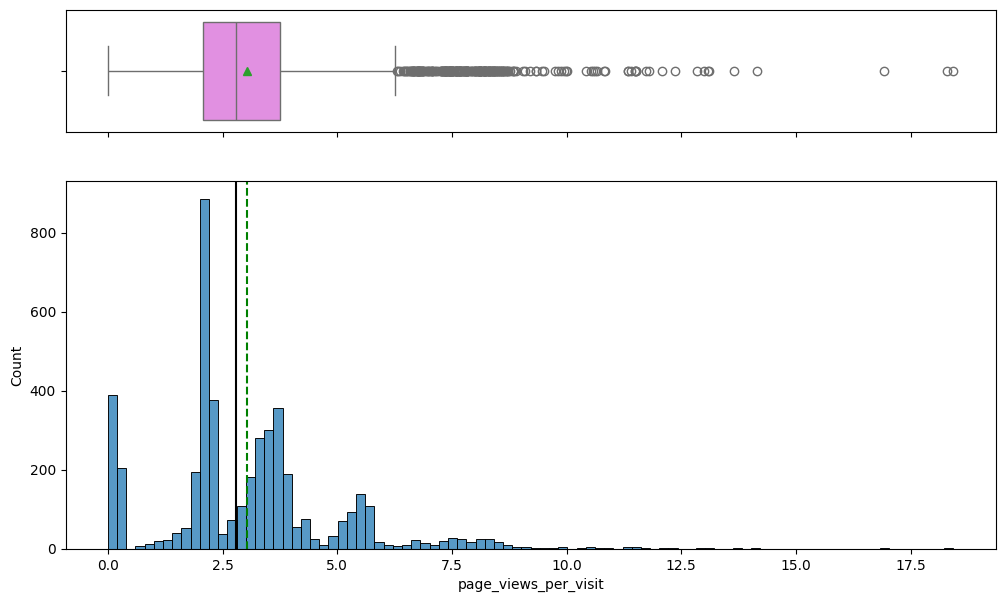

In [21]:
histogram_boxplot(data, "page_views_per_visit")


Observation: the number of outliers in this feature is highest amongst all the numerical distributions



Current Occupation and Lead Status


In [22]:
data.columns


Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')

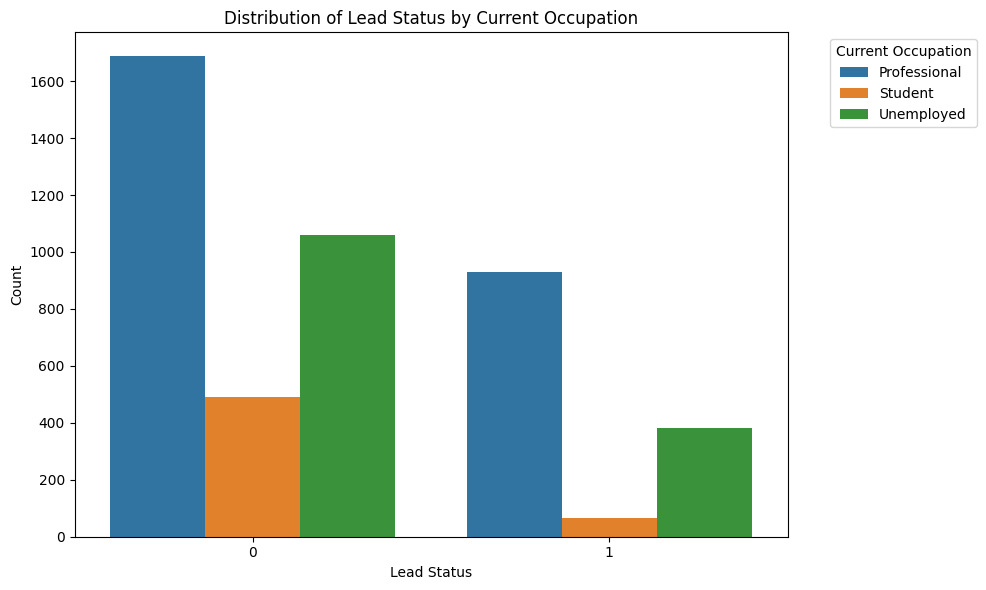

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='status', hue='current_occupation')
plt.title('Distribution of Lead Status by Current Occupation')
plt.xlabel('Lead Status')
plt.ylabel('Count')
plt.legend(title='Current Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

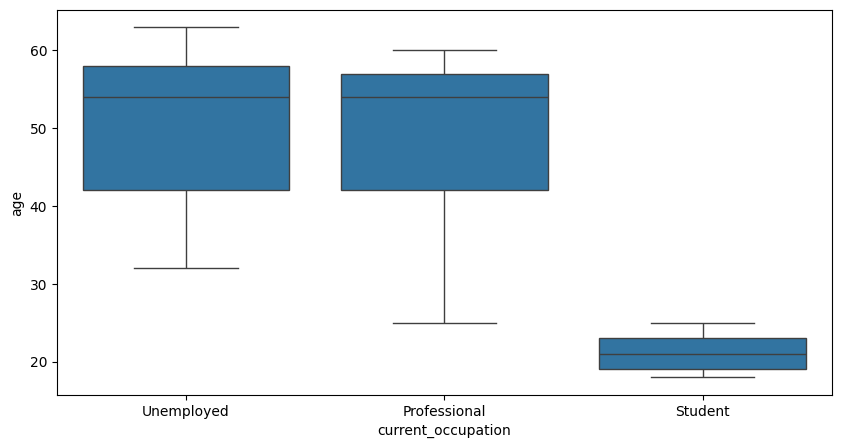

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [25]:
data.groupby(["current_occupation"])["age"].describe()


,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


In [26]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

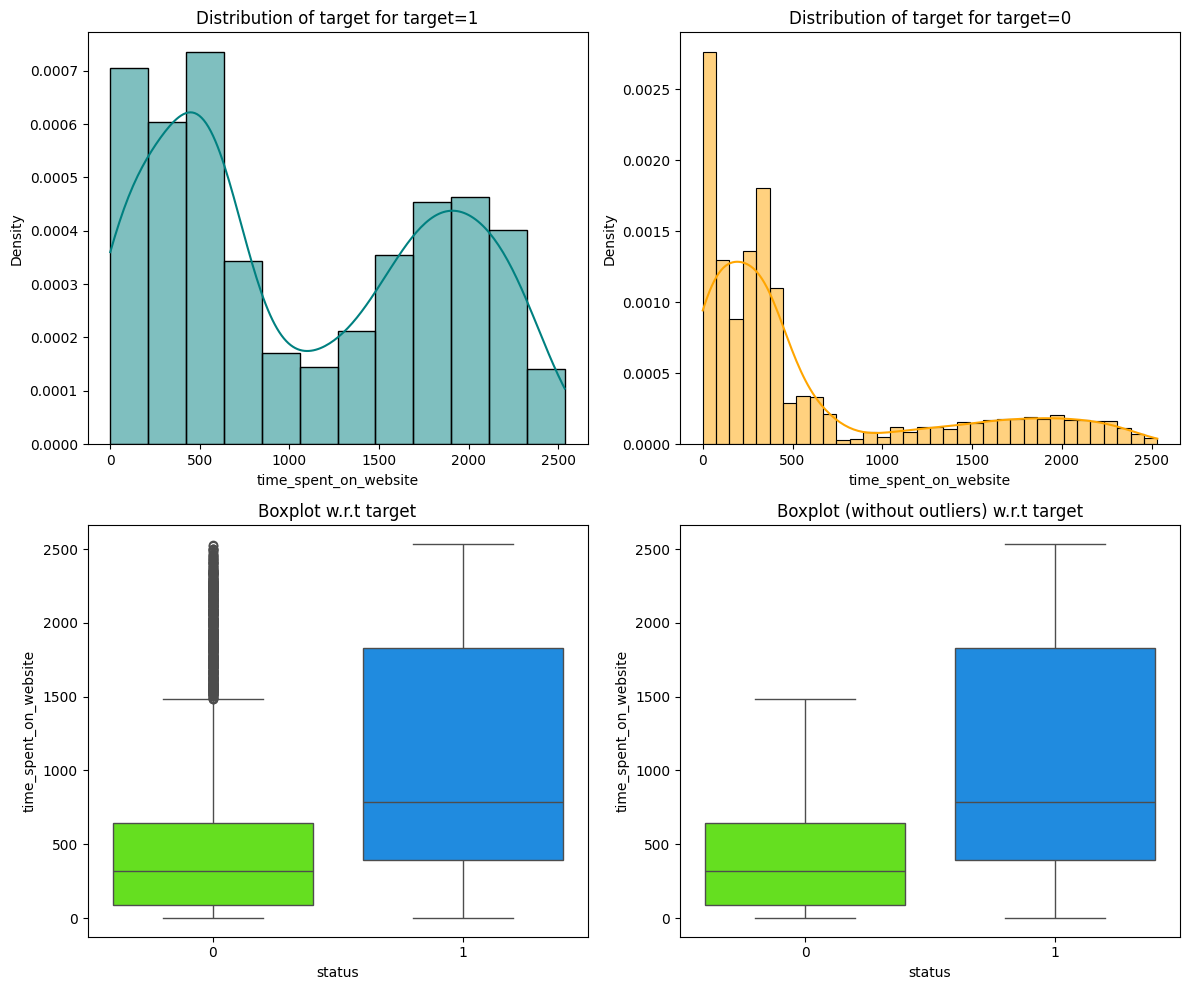

In [27]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")


In [28]:
data.groupby(["status"])["time_spent_on_website"].median()


status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

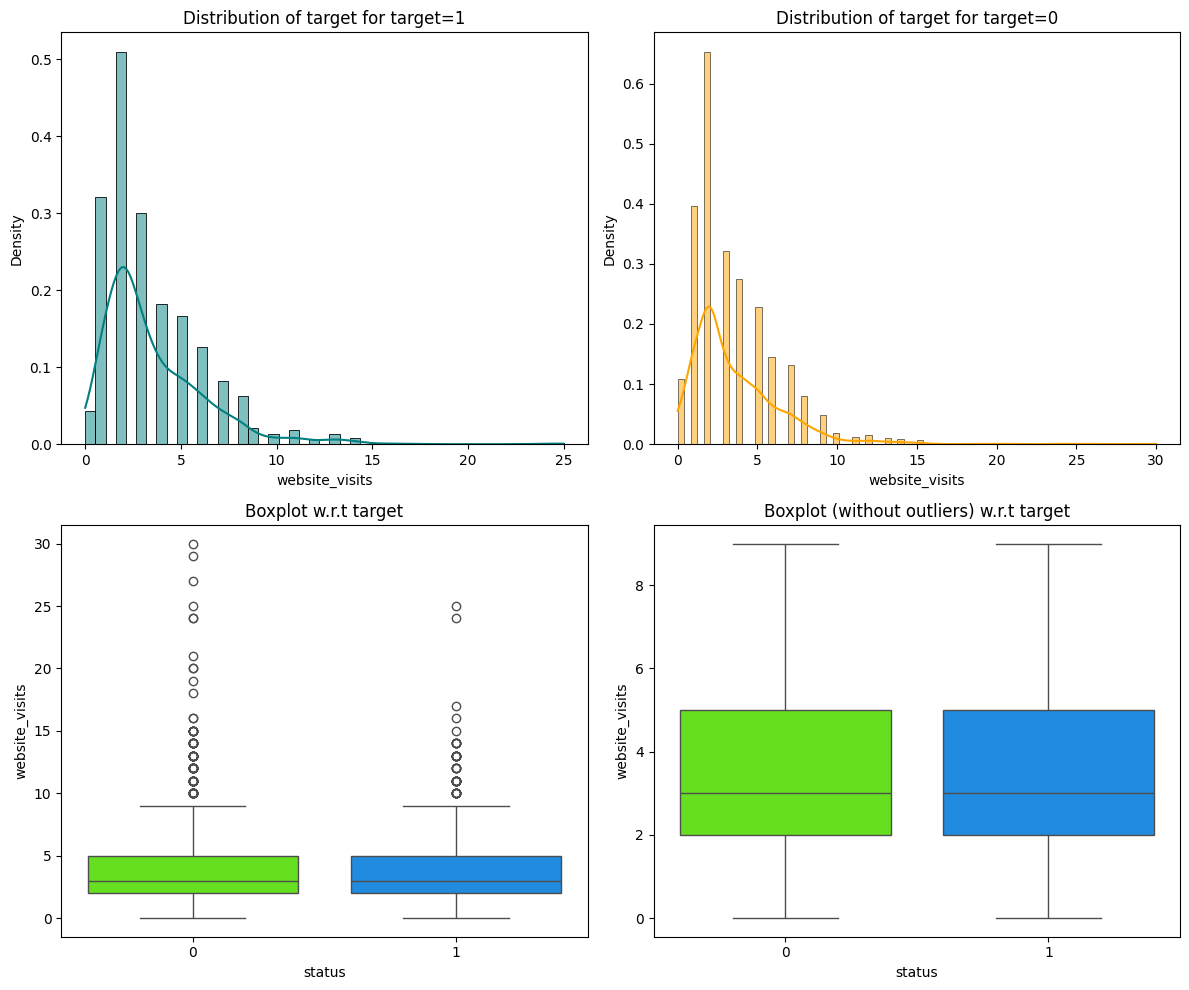

In [29]:
distribution_plot_wrt_target(data, "website_visits", "status")


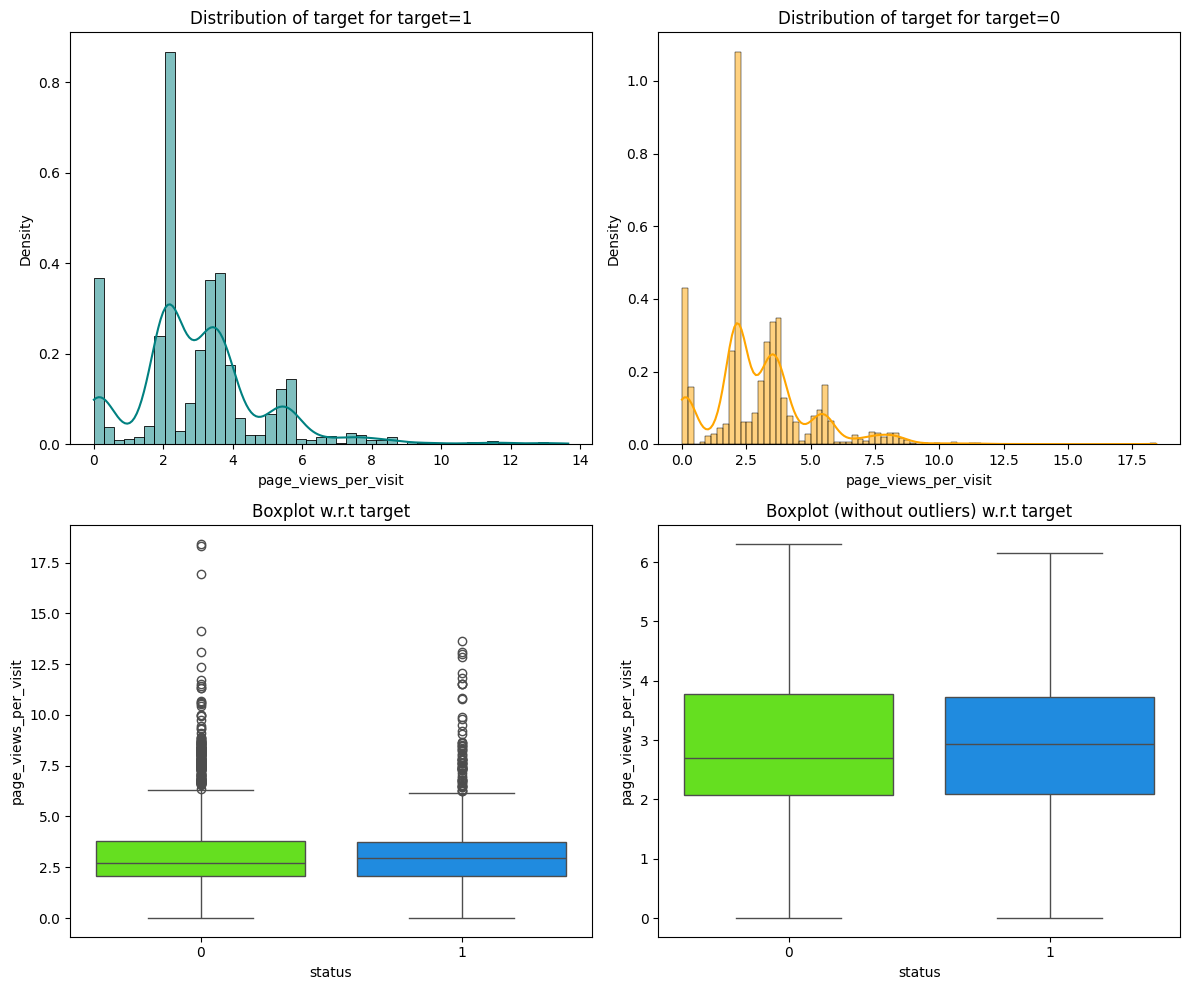

In [30]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")


In [31]:
conversion_rates = data.groupby('first_interaction')['status'].mean()
print(conversion_rates)


first_interaction
Mobile App   0.10531
Website      0.45594
Name: status, dtype: float64


In [32]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['first_interaction'], data['status'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")

Chi-Squared Value: 668.0813826411269
P-value: 2.611251831709229e-147


There is a significant association between the first channel of interaction and the lead conversion status as the p-value is lower than threshold.

In [33]:
# Calculate the conversion rate for each last activity type
conversion_rates = data.groupby('last_activity')['status'].mean().sort_values(ascending=False)

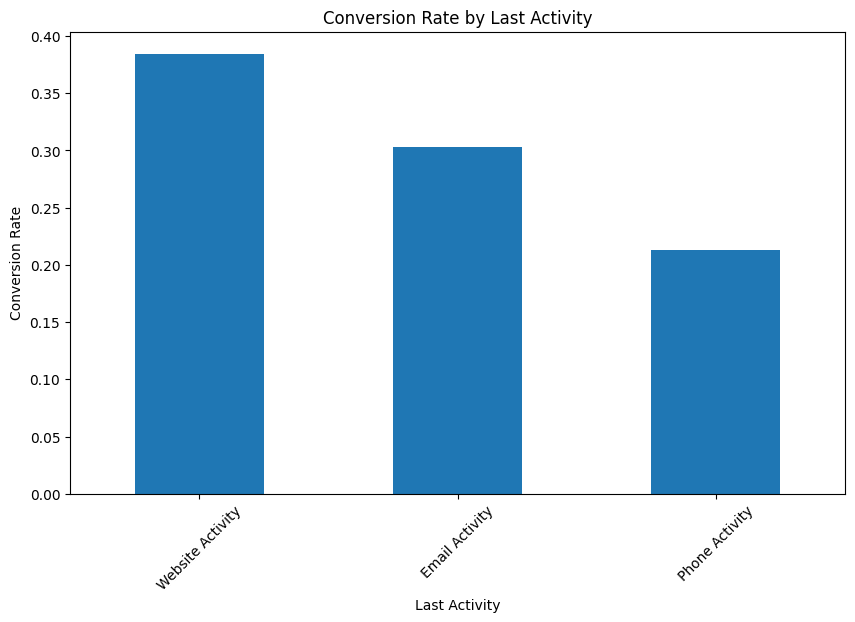

In [34]:
# Plot the conversion rates
conversion_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Conversion Rate by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

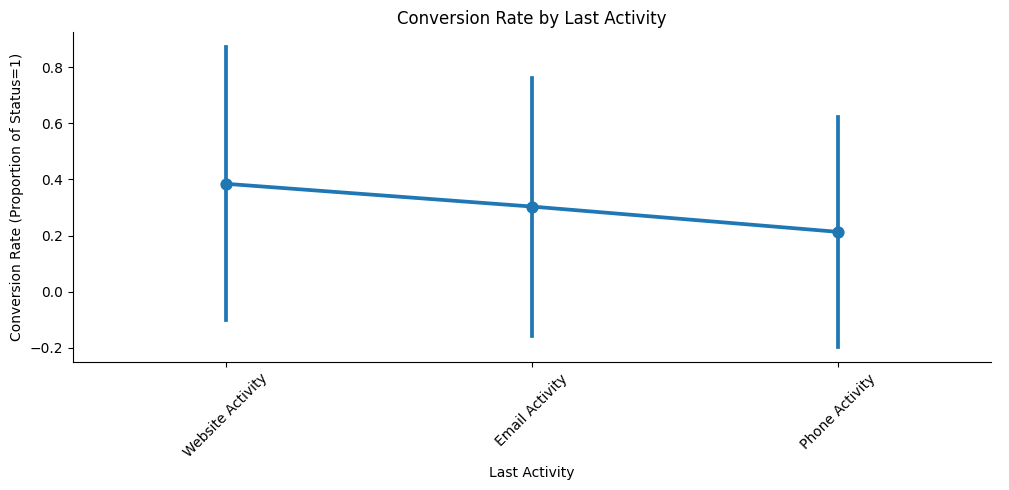

In [35]:
sns.catplot(x='last_activity', y='status', data=data, kind='point', aspect=2, ci='sd')
plt.title('Conversion Rate by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Conversion Rate (Proportion of Status=1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Calculate the conversion rate for each mode of interaction
modes_of_interaction = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
# Convert 'Yes'/'No' to 1/0 for each mode
for mode in modes_of_interaction:
    data[mode] = data[mode].map({'Yes': 1, 'No': 0})
# Calculate the conversion rate for each mode
conversion_rates = {}
for mode in modes_of_interaction:
    # Calculate mean only for rows where the mode is 'Yes' (now converted to 1)
    rate = data[data[mode] == 1]['status'].mean()
    conversion_rates[mode] = rate

# Print conversion rates to verify calculations
print(conversion_rates)

{'print_media_type1': 0.3199195171026157, 'print_media_type2': 0.3218884120171674, 'digital_media': 0.3187855787476281, 'educational_channels': 0.2794326241134752, 'referral': 0.6774193548387096}


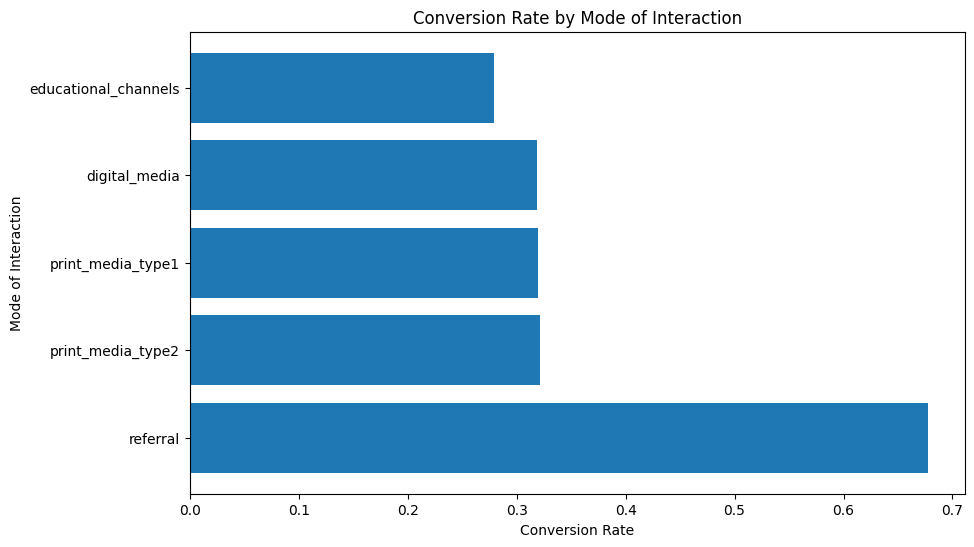

In [37]:
# Convert the conversion rates to a DataFrame
conversion_rates_df = pd.DataFrame(list(conversion_rates.items()), columns=['Interaction_Mode', 'Conversion_Rate'])

# Plot the conversion rates
plt.figure(figsize=(10, 6))
conversion_rates_df = conversion_rates_df.sort_values('Conversion_Rate', ascending=False)
plt.barh(conversion_rates_df['Interaction_Mode'], conversion_rates_df['Conversion_Rate'])  # using horizontal bar plot for better readability
plt.xlabel('Conversion Rate')
plt.ylabel('Mode of Interaction')
plt.title('Conversion Rate by Mode of Interaction')
plt.show()

In [38]:
# Now that the modes are binary, create the contingency table for the Chi-Squared test
contingency_table = pd.crosstab(index=data['status'], columns=[data['print_media_type1'],
                                                               data['print_media_type2'],
                                                               data['digital_media'],
                                                               data['educational_channels'],
                                                               data['referral']])

In [39]:
from scipy.stats import chi2_contingency

# Apply the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")

Chi-Squared Value: 89.99136488063837
P-value: 2.870313556108053e-09


There is a statistically significant difference in conversion rates across the different modes of interaction.



In [40]:
# Assuming the dataset has a 'profile_completion' column with categories like 'Low', 'Medium', 'High'
conversion_rates_by_profile = data.groupby('profile_completed')['status'].mean()


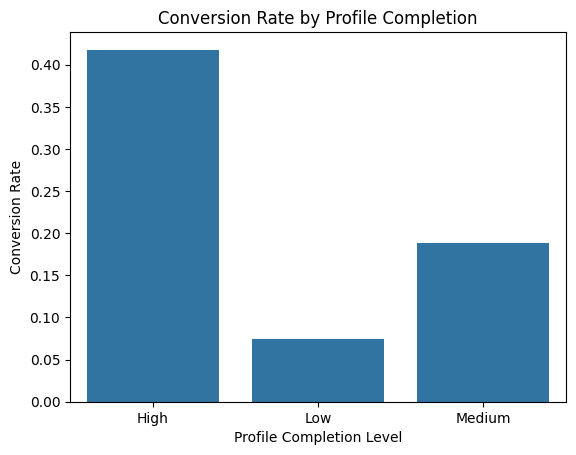

In [41]:
sns.barplot(x=conversion_rates_by_profile.index, y=conversion_rates_by_profile.values)
plt.title('Conversion Rate by Profile Completion')
plt.xlabel('Profile Completion Level')
plt.ylabel('Conversion Rate')
plt.show()

In [42]:
from scipy.stats import f_oneway

# Create groups for each profile completion category
group_low = data[data['profile_completed'] == 'Low']['status']
group_medium = data[data['profile_completed'] == 'Medium']['status']
group_high = data[data['profile_completed'] == 'High']['status']

# Perform ANOVA test
f_stat, p_value = f_oneway(group_low, group_medium, group_high)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 165.15946022088713
P-value: 5.3198526686430796e-70


The results indicate that there are statistically significant differences in the conversion rates for different levels of profile completion.



## Data Preprocessing
- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

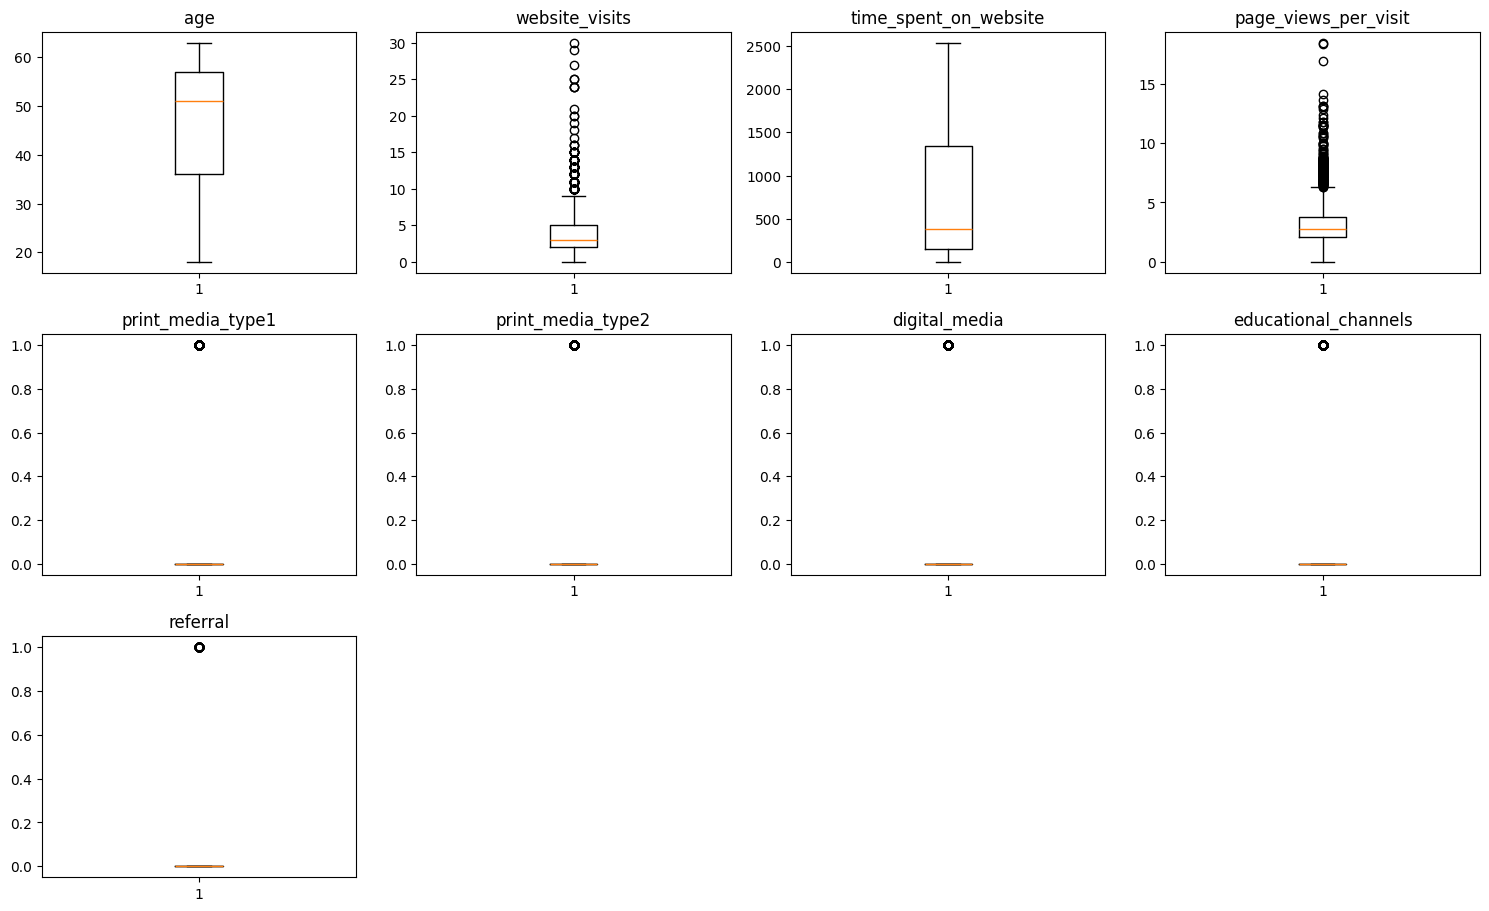

In [43]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [44]:
#Feature Engineering based on correlation for age and status and time-spent on website and status
data['engagement_score'] = (data['website_visits'] +
                                    data['time_spent_on_website'] +
                                    data['page_views_per_visit'])

data['age_engagement_interaction'] = data['age'] * data['engagement_score']

Feature scaling is not necessary for tree-based models like Decision Trees and Random Forests because these models do not rely on the scale or distribution of the features. They make decisions based on order (which item is larger) rather than on the specific scale of the feature values, meaning that the varying scales of the raw data do not affect these models' performance.

For decision tree models, including random forests, outliers will generally have less impact because these models are non-parametric—they do not make assumptions about the data distribution.

## EDA

- It is a good idea to explore the data once again after manipulating it.

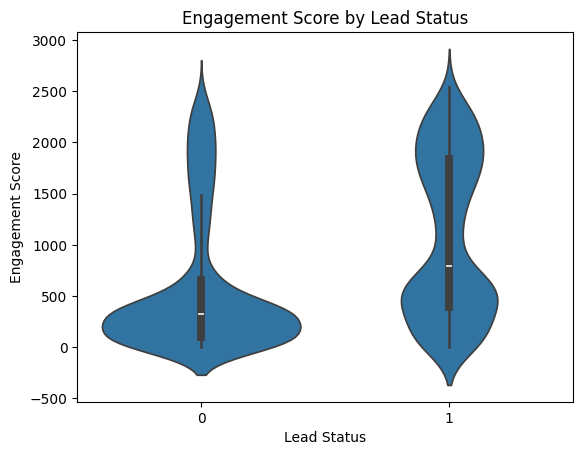

In [45]:
sns.violinplot(x='status', y='engagement_score', data=data)
plt.title('Engagement Score by Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Engagement Score')
plt.show()

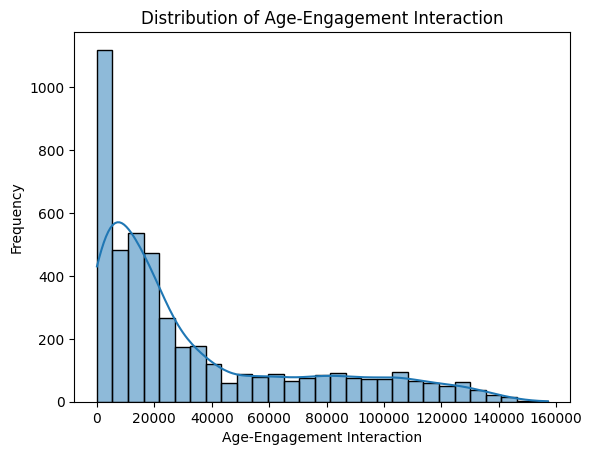

In [46]:
sns.histplot(data['age_engagement_interaction'], kde=True)
plt.title('Distribution of Age-Engagement Interaction')
plt.xlabel('Age-Engagement Interaction')
plt.ylabel('Frequency')
plt.show()

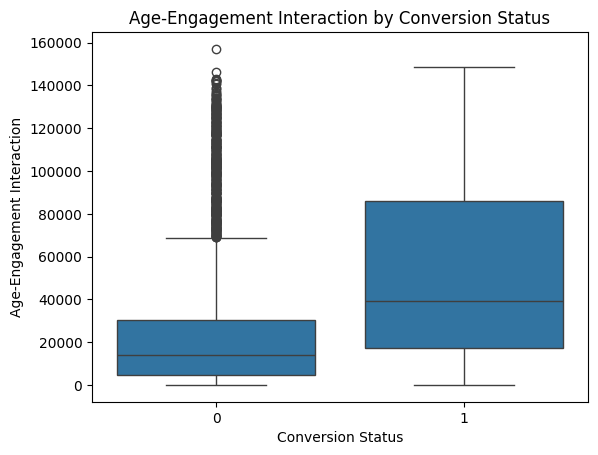

In [47]:
sns.boxplot(x='status', y='age_engagement_interaction', data=data)
plt.title('Age-Engagement Interaction by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Age-Engagement Interaction')
plt.show()

In [48]:
print(data['age_engagement_interaction'].describe())


count     4612.00000
mean     33938.13910
std      37242.59161
min          0.00000
25%       5722.78575
50%      17973.47350
75%      52094.93200
max     157092.39000
Name: age_engagement_interaction, dtype: float64


In [49]:
print(data[['age_engagement_interaction', 'status']].corr())


                            age_engagement_interaction  status
age_engagement_interaction                     1.00000 0.31954
status                                         0.31954 1.00000


Outlier detection, treatment, and Data-split


In [50]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'engagement_score',]:
    # Calculate the 1st and 99th percentiles
    lower_bound = data[col].quantile(0.01)
    upper_bound = data[col].quantile(0.99)

    # Cap the values
    data[col] = np.clip(data[col], lower_bound, upper_bound)

In [51]:
X = data.drop(["status"], axis=1)
Y = data['status']  # Define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Get dummies for X and avoid the dummy variable trap

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 18)
Shape of test set :  (1384, 18)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## Building a Decision Tree model

In [53]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [54]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

In [55]:
# Fit the classifier on the training data
d_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



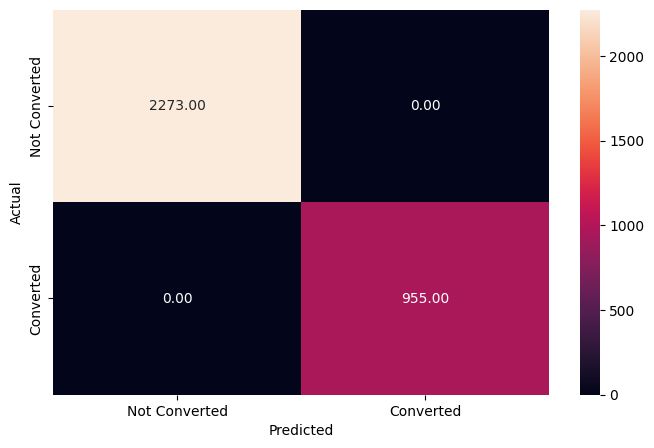

In [56]:
y_pred_train1 =  d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

The Decision tree is giving a 100% score for all metrics on the training dataset.

In [57]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 0.3, 1: 0.7}"


              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



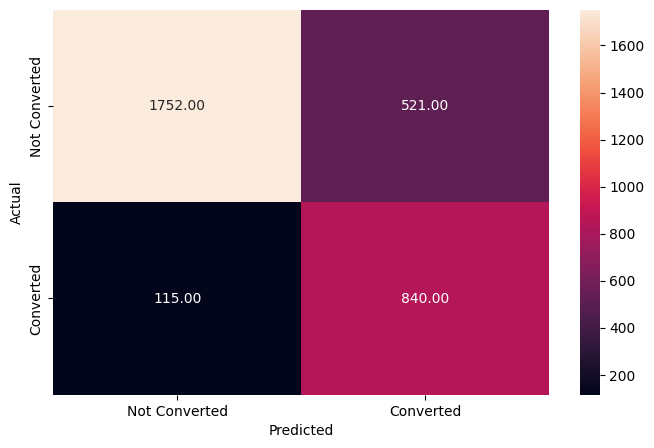

In [58]:
y_pred_train2 = d_tree_tuned.predict(X_train)
# Using the metrics_score function to evaluate the model's performance
metrics_score(y_train, y_pred_train2)

The Decision Tree works well on the untuned training data but not so well on the tuned train data as the recall is 0.88 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the original training data. The precision on the tuned trained data suggests that there's a 38% (1 - 0.62) chance that the model will predict that a person is lead is going to convert even though he/she would not, and the company may waste their time and energy on these leads who are not at the brink of conversion.

In [59]:
# Making predictions on the testing data with the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)


              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



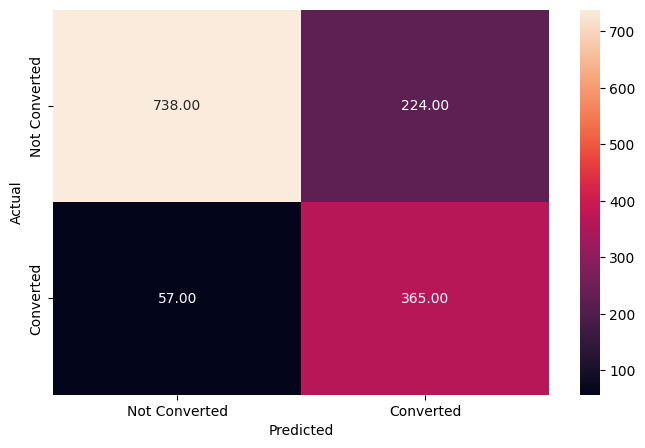

In [60]:
# Using the metrics_score function to evaluate the model's performance on the test data
metrics_score(y_test, y_pred_test2)

The Decision Tree works not so well on the tuned test data as the recall is 0.86 in comparison to 0.88 for the tuned training dataset, i.e., the Decision Tree is overfitting the training data. The precision on the tuned trained data suggests that there's a 38% (1 - 0.62) chance that the model will predict that a person is lead is going to convert even though he/she would not, and the company may waste their time and energy on these leads who are not at the brink of conversion.

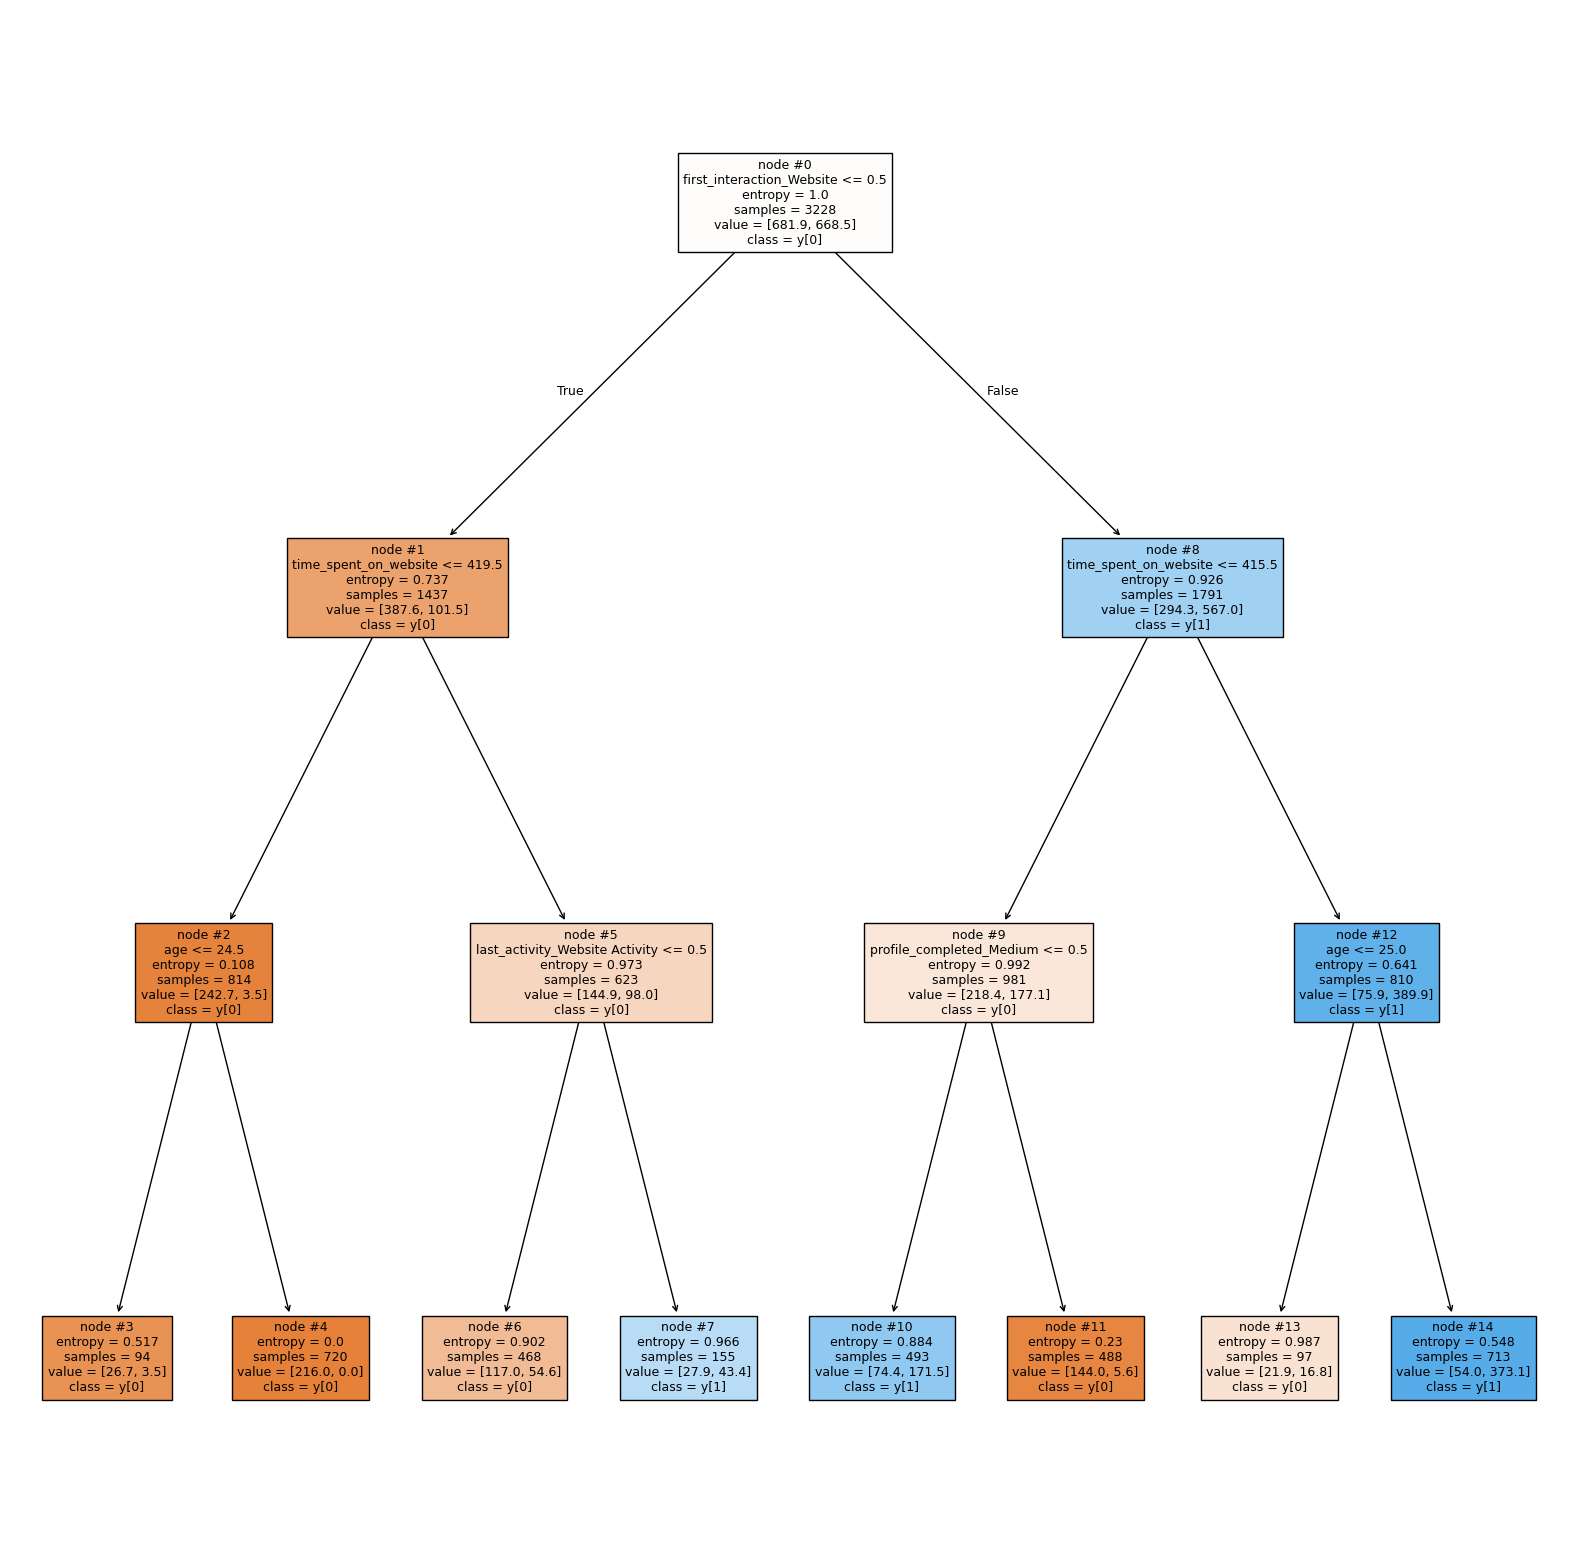

In [61]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [62]:
# Importance of features in the tree building

# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
print_media_type2              0.00000
digital_media                  0.00000
educational_channels           0.00000
referral                       0.00000
website_visits                 0.00000
age_engagement_interaction     0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
print_media_type1              0.00000
profile_completed_Low          0.00000
page_views_per_visit           0.00000
last_activity_Phone Activity   0.00000
engagement_score               0.00000


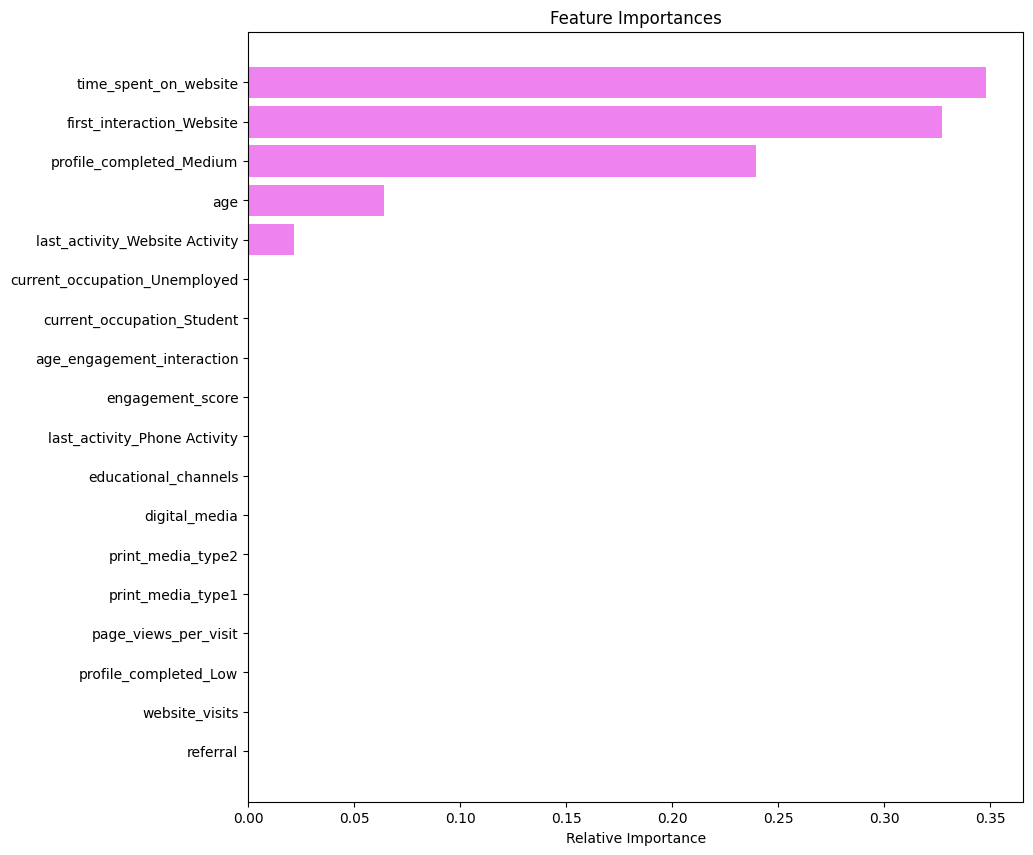

In [63]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Observations:

Time spent on the website and first_interaction_website are the most important features followed by profile_completed, age, and last_activity. The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

## Do we need to prune the tree?

Yes, we should prune the tree since some features are not important at all in the decision tree model



In [64]:
from sklearn.model_selection import cross_val_score

# Search for the optimal ccp_alpha value
alpha_values = np.linspace(0.001, 0.02, 50)
mean_scores = []

for ccp_alpha in alpha_values:
    clf = DecisionTreeClassifier(random_state=7, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

# Find the alpha value with the highest mean accuracy score
optimal_ccp_alpha = alpha_values[np.argmax(mean_scores)]

# Prune the tree using the optimal ccp_alpha
d_tree_pruned = DecisionTreeClassifier(random_state=7, ccp_alpha=optimal_ccp_alpha)
d_tree_pruned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


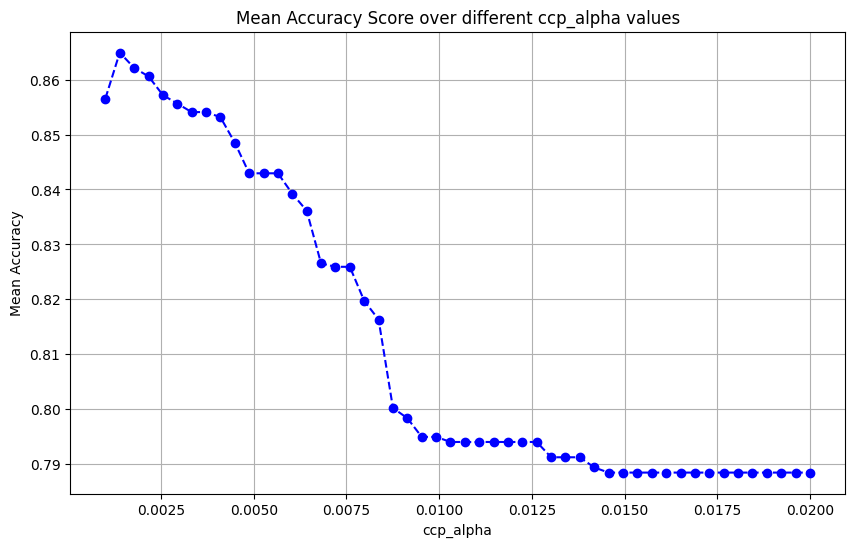

In [65]:
# Plotting the mean accuracy scores over different ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_scores, marker='o', linestyle='--', color='b')
plt.title('Mean Accuracy Score over different ccp_alpha values')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

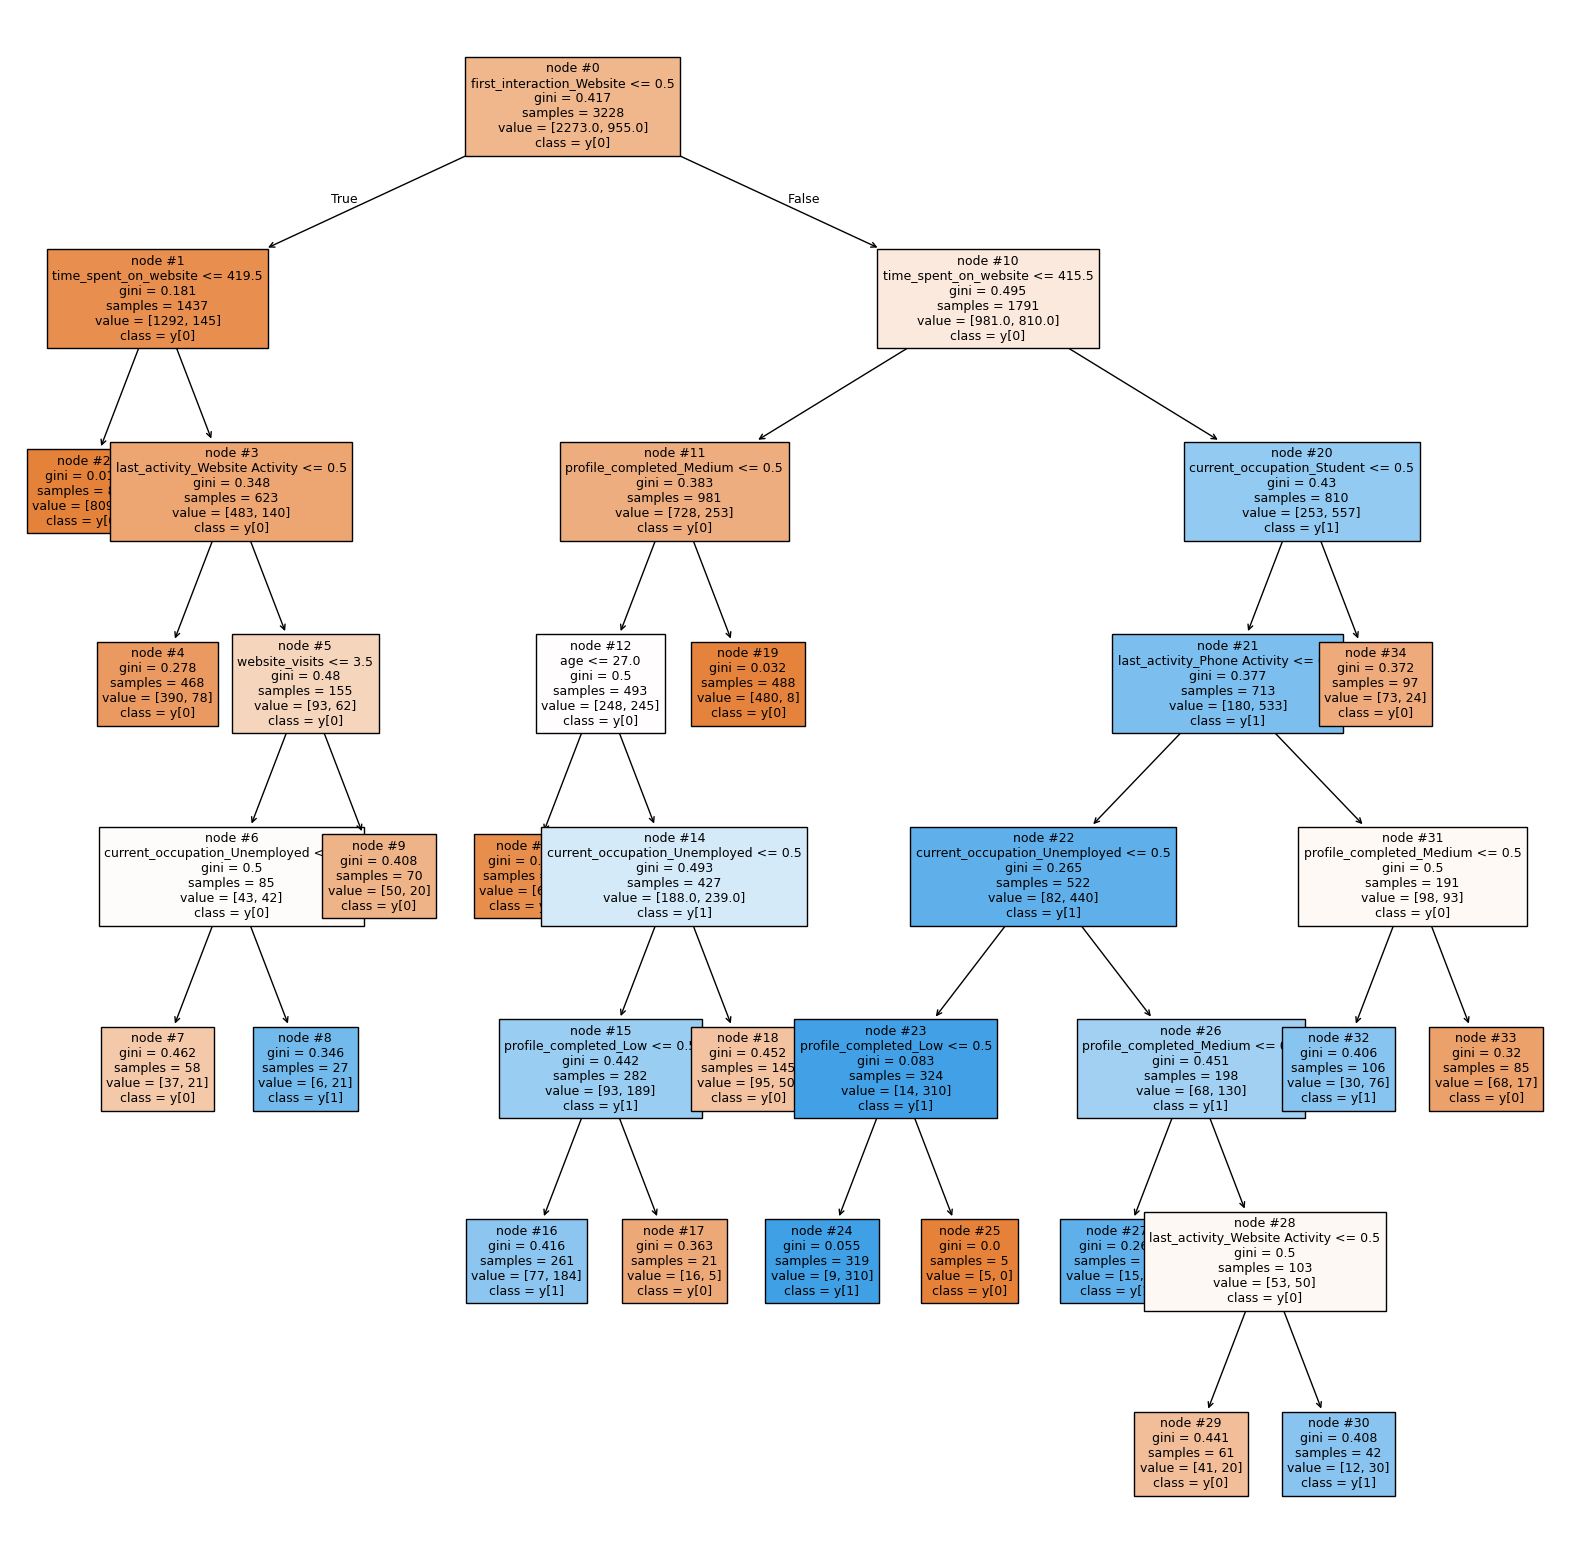

In [66]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_pruned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [67]:
rf_estimator = RandomForestClassifier(random_state=1)

# Fit the classifier on the training data
rf_estimator.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



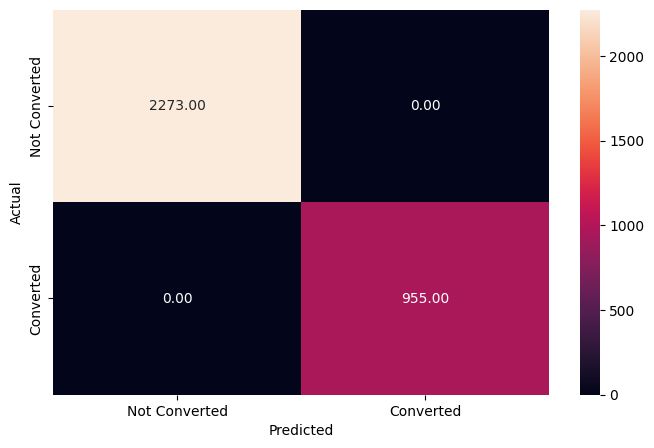

In [68]:
# Making predictions on the training data with the random forest classifier
y_pred_train3 = rf_estimator.predict(X_train)

# Using the metrics_score function to evaluate the model's performance on the training data
metrics_score(y_train, y_pred_train3)

Observation:

For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.79      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.84      0.85      0.84      1384



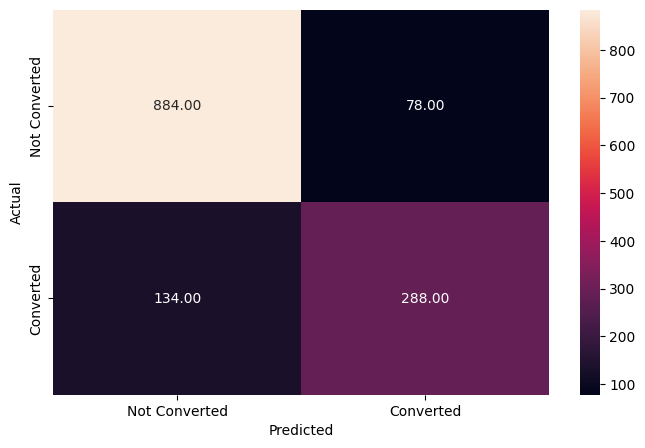

In [69]:
# Making predictions on the testing data with the random forest classifier
y_pred_test3 = rf_estimator.predict(X_test)

# Using the metrics_score function to evaluate the model's performance on the test data
metrics_score(y_test, y_pred_test3)

The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.68 for class 1. Precision is high for the test data as well.

In [70]:
# Choose the type of classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
import sklearn.metrics as metrics

# Setup the RandomForestClassifier with your specified criterion and random state
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Define the grid of parameters to search over
parameters = {
    "n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced", {0: 0.3, 1: 0.7}]
}

# Define the scorer based on recall score for class 1
scorer = make_scorer(recall_score, pos_label=1)

# Setup GridSearchCV with the RandomForestClassifier, the grid of parameters, and the scoring method
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search object to the training data to search for the best parameters
grid_obj.fit(X_train, y_train)

# After the search, save the best estimator to rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# If you'd like to print out the best parameters found, you can do so like this:
print("Best parameters found: ", grid_obj.best_params_)

Best parameters found:  {'class_weight': 'balanced', 'max_depth': 6, 'max_features': 0.8, 'max_samples': 0.9, 'min_samples_leaf': 25, 'n_estimators': 110}


In [71]:
## random search
##from sklearn.model_selection import RandomizedSearchCV
##rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)
# Setup the randomized search with the same parameters and distributions
##random_search = RandomizedSearchCV(rf_estimator_tuned, param_distributions=parameters, n_iter=10, scoring=scorer, cv=5, random_state=7, n_jobs=-1)

# Fit the randomized search object to the training data
##random_search.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
##rf_estimator_tuned = random_search.best_estimator_

In [72]:
rf_estimator_tuned.fit(X_train, y_train)


,n_estimators,110
,criterion,'entropy'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.85      3228



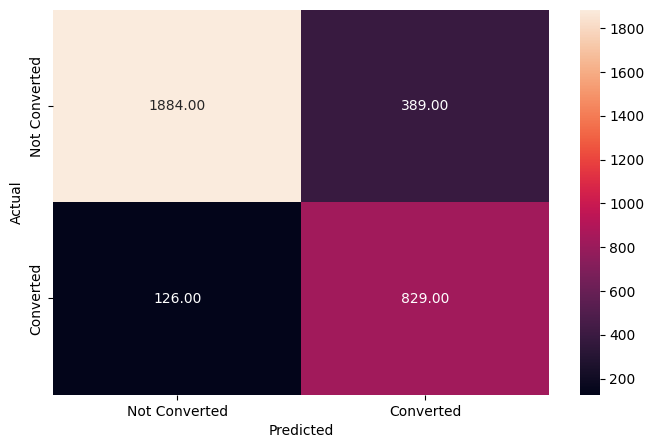

In [73]:
# Making predictions on the training data with the tuned random forest classifier
y_pred_train4 = rf_estimator_tuned.predict(X_train)

# Using the metrics_score function to evaluate the model's performance on the training data
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       962
           1       0.69      0.84      0.76       422

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.84      1384



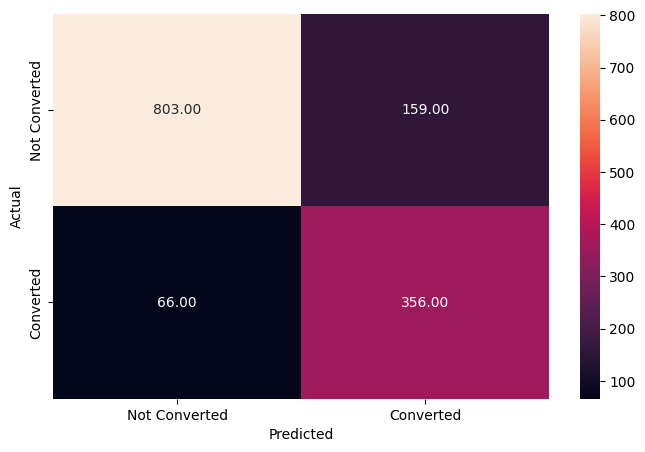

In [74]:
# Making predictions on the test data with the tuned random forest classifier
y_pred_test4 = rf_estimator_tuned.predict(X_test)

# Using the metrics_score function to evaluate the model's performance on the test data
metrics_score(y_test, y_pred_test4)

Note that the tuned test dataset performs better than the tuned trained dataset in terms of precision for the class 1. The recall has reduced though by 0.03. Accuracy remains the same.

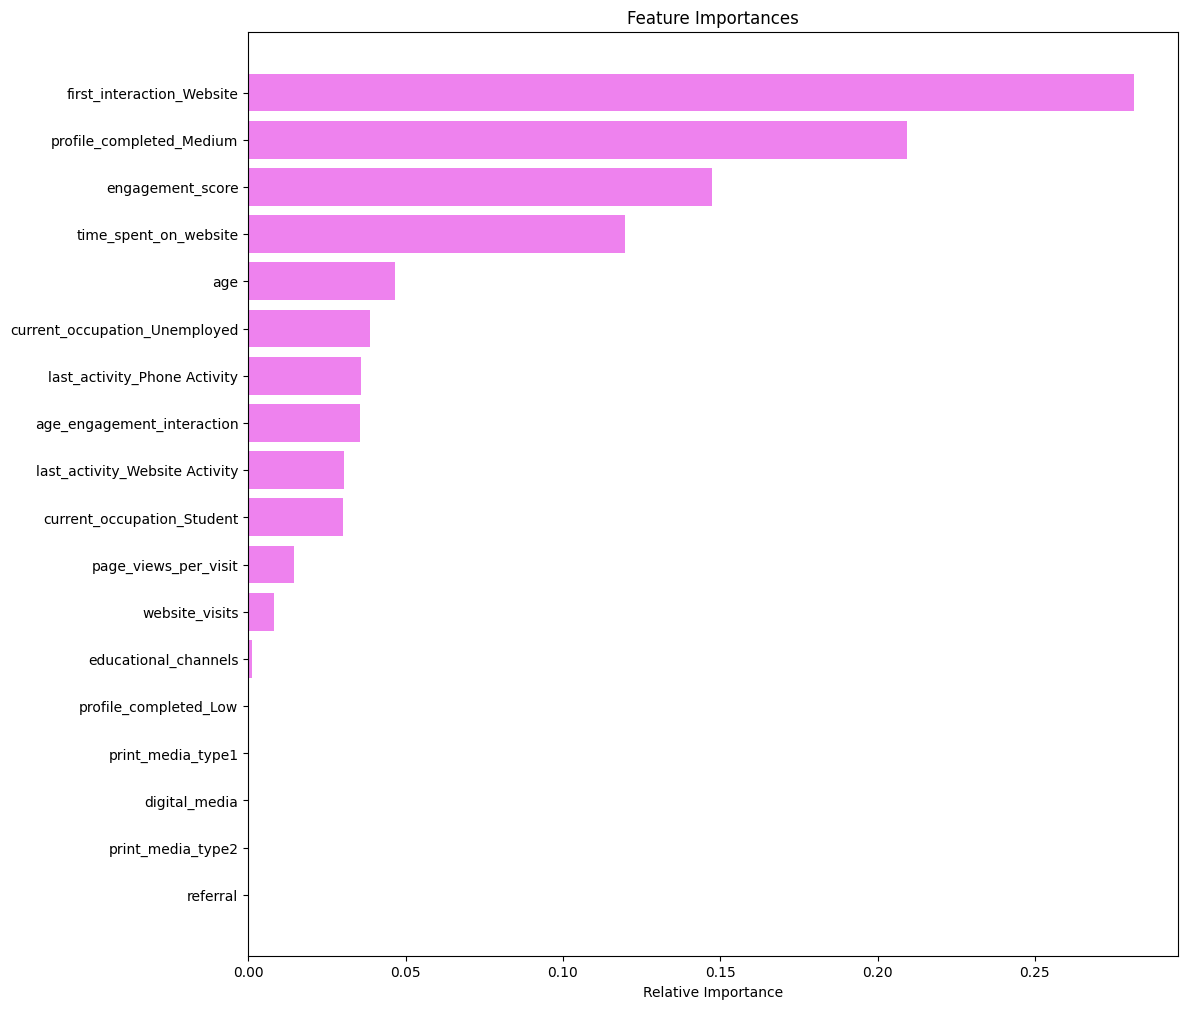

In [75]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Observations: Similar to the decision tree model, time spent on website, first_interaction_website, profile_completed, and age are the top four features that help distinguish between not converted and converted leads. Unlike the decision tree, the random forest gives some importance to other variables like occupation, page_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## Do we need to prune the tree?

We don't need to prune the tree when considering the random forest trees because there is built-in regularization: Random Forest inherently includes several mechanisms that prevent overfitting despite the complexity of individual trees. This is achieved through the randomness introduced by selecting different subsets of features and training examples. The ensemble method, where predictions are averaged (for regression) or voted upon (for classification), further mitigates the risk of overfitting.

Also getting the results, we can see that each variable is holding some importance in the decision making process here, so no need to prune the tree.

However, the above is true only if we used random search instead of GridSearch. Since we used GridSearch, we have certain features that are not that important, hence we can prune the tree. To further prune the tree we can only change the tuning of individual parameters like we did before.

## Actionable Insights and Recommendations

We saw that time_spent_on_website is the most important feature when considering the lead status in the decision tree model and the first_interaction feature is the most important in the random forest model. Since time_spent_on_website is a crucial factor, ensuring that the website is engaging, informative, and easy to navigate can encourage potential leads to spend more time exploring the content.
The company should focus marketing efforts and budgets on the channels that have the highest lead conversion rate.
They should focus on user feedback for designing their recommendation systems further and employ A/B testing for experimenting with different strategies.
The insights regarding the statistical tests are visualized via graphs and commented upon as well in the document. We have used ANOVA and Chi-squared test to judge the impact of these factors.
We have gauged the model predictions through decision trees and random forests and have visualized and commented upon its findings.
Further we have included feature engineering (adding two new features) and performed EDA on the dataset before and after adding the features
we have tuned the model to deal with overfitting and used classification reports to measure the precion, recall, f1 score, accuracy and confusion matrix of the variables
we created 2 lists: a numerical one and a categorical one to proceed with our analysis on the same and have gauged the target variable wrt all the other columns through our univariate, bivariate, and multivariate analysis.
We determined the skewness of the distributions of the numeric variables where we learnt that the age factor is skewed left. The central tendency of points, the shape and other factors.
We also focused on important features at the end of predictive models and decided upon their pruning status.